In [2]:
 #Workshop1 Mean Squared Error 

from sklearn.metrics import mean_absolute_error    
y_true = [0,0,1,1]  #real infor 
y_pred = [0,0,0,0]  #assume predict result from model train 

mean_absolute_error(y_true,y_pred)



0.5

In [3]:
#if the data was true 

from sklearn.metrics import mean_absolute_error    
y_true = [0,0,1,1]  #real infor 
y_pred = [0,0,1,1]  #assume predict result from model train 

mean_absolute_error(y_true,y_pred)

0.0

In [4]:
#Another example

from sklearn.metrics import mean_absolute_error    
y_true = [0,0,1,1,2.5,2.4]  #real infor 
y_pred = [0,0,0,0,0.4,1.1]  #assume predict result from model train 

mean_absolute_error(y_true,y_pred)

0.8999999999999999

In [5]:
#Workshop2 find loss with Bainary's Cross-entropy

import numpy as np 
import tensorflow as tf


y_true = [0,0,1,1]  #real infor 
y_pred = [0,0,1,1]  #assume predict result from model train 

y_pred = np.array(y_pred).astype('float')

bce = tf.keras.losses.BinaryCrossentropy() #change type data to float
bce(y_true, y_pred).numpy()

0.0

In [6]:
#example1 

y_true = [0,0,1,1]  #real infor 
y_pred = [0,0,0,0]  #assume predict result from model train 

y_pred = np.array(y_pred).astype('float')

bce = tf.keras.losses.BinaryCrossentropy() #change type data to float
bce(y_true, y_pred).numpy()


7.7124742351991875

In [7]:
#example2 
y_true = [0,0,1,1]  #real infor 
y_pred = [1,1,0,0]  #assume predict result from model train 

y_pred = np.array(y_pred).astype('float')

bce = tf.keras.losses.BinaryCrossentropy() #change type data to float
bce(y_true, y_pred).numpy()

15.424948470529964

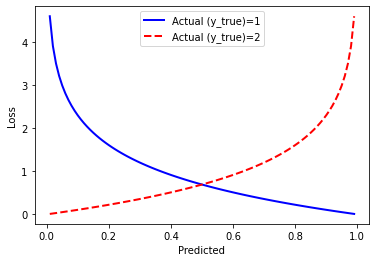

In [8]:
#Graph 

import matplotlib.pyplot as plt

def cross_entropy_loss(yHat,y):
    if y ==1:
        return -np.log(yHat)
    else:
        return -np.log(1-yHat)
    
y_pred = np.arange(0.01,0.999,0.01)

cost_1 = cross_entropy_loss(y_pred,1)  #เทีบค่า y_true =1 
cost_2 = cross_entropy_loss(y_pred,0)  #เทีบค่า y_true =0


plt.plot(y_pred,cost_1,label='Actual (y_true)=1',c='b',ls='-',lw=2)
plt.plot(y_pred,cost_2,label='Actual (y_true)=2',c='r',ls='--',lw=2)
plt.xlabel('Predicted')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 

X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.1, random_state=1) #สร้าง 1000ข้อมูล  5 กลุ่ม แต่ละกลุ่มมี 2 feture
X_df = pd.DataFrame(X,columns=['weight','height'])  
y_df = pd.DataFrame(y,columns=['class']) #ylabel
df = pd.concat([X_df,y_df],axis=1) 
target_map = {0:'horse',1:'bird',2:'fish',3:'cat',4:'dog'}
df['class']=df['class'].map(target_map)


df.sample(5,random_state=100)


,weight,height,class
249,-11.889046,-3.890515,bird
353,-9.501477,-4.717762,bird
537,-3.277917,1.611778,dog
424,-9.297471,-2.403170,bird
564,-2.897847,0.377424,dog


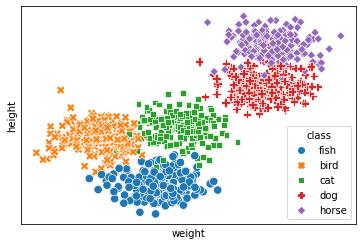

In [10]:
#Graph
sns.scatterplot(x='weight', y='height', data=df, s=70,
                hue=df['class'], style=df['class'])

plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
#check obj
class_names,y = np.unique(df['class'],return_inverse=True)
class_names

array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object)

In [12]:
#Check some infor 
X=df.drop('class',axis=1)
X.head()

,weight,height
0,-7.253467,-7.947597
1,-12.447536,-5.822616
2,-5.973586,-3.275877
3,-5.310976,-2.953204
4,-1.860408,1.477063


In [13]:
#Check some infor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       [ 0.0185207 , -0.22299352]])

In [14]:
# Train and Test 

from sklearn.model_selection import train_test_split

X_train,y_train,X_test,y_test = train_test_split(X_sc,y,test_size=0.25,random_state=1) #test 25% 
X_train.shape,X_test.shape


((750, 2), (750,))

In [15]:
#Create model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() #Start create Model 
model.add(Dense(100,activation ='relu',input_shape=(2,))) #add layer 100 Node

#output layer 5 Node 
model.add(Dense(5,activation='softmax'))# use softamax for multi-class classification 




In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Error  skip to workshop4

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.25)

score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

ValueError: Data cardinality is ambiguous:
  x sizes: 562
  y sizes: 250
Make sure all arrays contain the same number of samples.

In [19]:
y_pred = model.predict(X_test)

y_pred[:4]
y_pred[:4].round(3)

ValueError: in user code:

    File "C:\Users\s6406022610031\Anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\s6406022610031\Anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\s6406022610031\Anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\s6406022610031\Anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\s6406022610031\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\s6406022610031\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None


In [ ]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

In [ ]:
df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [ ]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)    

In [ ]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X_train, y_train, clf=model_no_ohe,
                          zoom_factor=1.)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Model Regions') 
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

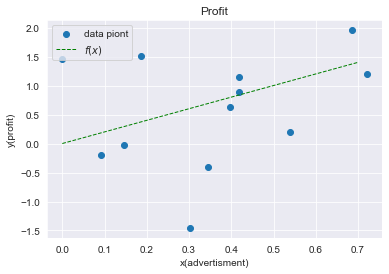

In [20]:
# Workshop4 Gradient Descent 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

sns.set_style('darkgrid')
np.random.seed(seed=1) 

x = np.random.uniform(0, 1, 12) 

def f(x): 
    return 2 * x + 0 #+ 0  

noise = 0.15 
noise = np.random.randn(x.shape[0]) * noise

y = f(x) + noise  
# random create infor  12 ชุด

np.random.seed(seed=1)  #กำหนดค่า seed ค่าสุ่ม
x = np.random.uniform(0, 1, 12)  #unifrom distribution  between 0-1 

#function f(x) =2*x
def f(x):
    return 2*x+0
niose = 0.15
niose = np.random.randn(x.shape[0]) #niose

y =f(x) + niose

plt.scatter(x,y,marker='o',label='data piont')
plt.plot([0,.7],[f(0),1.4],'g--',lw=1,label="$f(x)$")
plt.xlabel('x(advertisment)')
plt.ylabel('y(profit)')

plt.title('Profit')
plt.legend(loc=2)
plt.show()

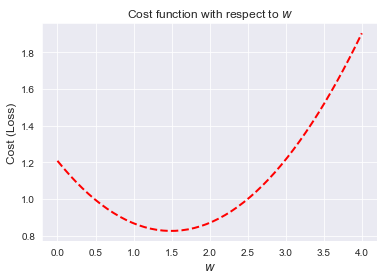

In [22]:
def neuron(x, w):
    return w*x + 0

def loss_mse(y_pred, y_true):
    return np.mean((y_true - y_pred)**2)


ws = np.linspace(0,4,num=50)  #สร้างข้อมูลค่า 0-4 50 ข้อมูล

#caculte loss 
loss_ws = [loss_mse(neuron(x,w), y) for w in ws]
#อีกแบบ
#loss_ws = np.vectorize(lambda w:loss_mse(neuron(x,w,y),y))(ws)


#Plot 
plt.plot(ws,loss_ws,'r--',lw=2,label='Cost function (MSE)')
plt.xlabel('$w$',fontsize =12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Cost function with respect to $w$')
plt.show()


In [23]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
X = x.reshape(-1, 1)

lm.fit(X, y)

print(lm.coef_, lm.intercept_)  # w and b

[1.15544857] 0.1636438056271322


In [30]:
#Gradient function 
def gradient(w,x,y_true):
    y_pred = neuron(w,x,)
    return 2*x*(y_pred,y_true)

#Update function delta w 
def delta_w(w_k,x,y,learning_rate):
    return learning_rate*np.mean(gradient(w_k,x,y))

#ค่า weight เริ่มต้
#w = np.random.rand()  #กรณืใช้ค่าสุ่ม

w=.08
learning_rate= .9   #Learning rate

#ทำการประมวลผล gradient descent updates และ print weight , loss
no_of_iteraion = 3  #จำนวน epoch

history_loss = [(w,loss_mse(neuron(x,w),y))]

for i in range(no_of_iteraion):
    dw = delta_w(w,x,y,learning_rate)  #update ผลต่าง dalta w 
    w= w-dw #Update current weight
    history_loss.append((w,loss_mse(neuron(x,w),y))) #บัททึก ค่า weight และ loss
    
#Print
for i in range(0,len(history_loss)):
    print('{} -> w: {:.2f} \t loss: {} '.format(i, history_loss[i][0], history_loss[i][1]))
    




0 -> w: 0.08 	 loss: 1.1682775244914259 
1 -> w: -0.16 	 loss: 1.2964737553240928 
2 -> w: -0.37 	 loss: 1.4206977496947892 
3 -> w: -0.54 	 loss: 1.5370424555228797 


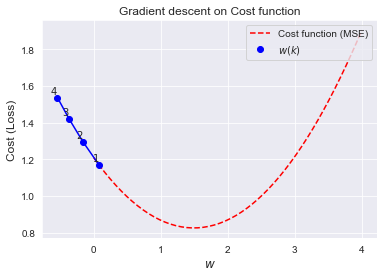

In [31]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)') 

for i in range(0, len(history_loss)-1):
    w1, c1 = history_loss[i]
    w2, c2 = history_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.02, f'${i+1}$', ha='right' )
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.02, f'${i+2}$', ha='right')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')

plt.legend(loc=1)
plt.show()

In [50]:
#Workshop 5 Gradient Descent
#Add  22 to no_of_ineraion
#Gradient function 
def gradient(w,x,y_true):
    y_pred = neuron(w,x,)
    return 2*x*(y_pred,y_true)

#Update function delta w 
def delta_w(w_k,x,y,learning_rate):
    return learning_rate*np.mean(gradient(w_k,x,y))

#ค่า weight เริ่มต้
#w = np.random.rand()  #กรณืใช้ค่าสุ่ม

w=.08
learning_rate= .9   #Learning rate

#ทำการประมวลผล gradient descent updates และ print weight , loss
no_of_iteraion = 22  #จำนวน epoch

history_loss = [(w,loss_mse(neuron(x,w),y))]

for i in range(no_of_iteraion):
    dw = delta_w(w,x,y,learning_rate)  #update ผลต่าง dalta w 
    w= w-dw #Update current weight
    history_loss.append((w,loss_mse(neuron(x,w),y))) #บัททึก ค่า weight และ loss
    
#Print
for i in range(0,len(history_loss)):
    print('{} -> w: {:.2f} \t loss: {} '.format(i, history_loss[i][0], history_loss[i][1]))


0 -> w: 0.08 	 loss: 1.1682775244914259 
1 -> w: -0.16 	 loss: 1.2964737553240928 
2 -> w: -0.37 	 loss: 1.4206977496947892 
3 -> w: -0.54 	 loss: 1.5370424555228797 
4 -> w: -0.69 	 loss: 1.6434947448980939 
5 -> w: -0.81 	 loss: 1.7392746053036163 
6 -> w: -0.92 	 loss: 1.8243814848780995 
7 -> w: -1.01 	 loss: 1.8992858111308977 
8 -> w: -1.08 	 loss: 1.9647218307795475 
9 -> w: -1.15 	 loss: 2.0215508058107585 
10 -> w: -1.20 	 loss: 2.0706727533251437 
11 -> w: -1.24 	 loss: 2.112971408796349 
12 -> w: -1.28 	 loss: 2.149281690671738 
13 -> w: -1.32 	 loss: 2.1803721954877116 
14 -> w: -1.34 	 loss: 2.2069375466171923 
15 -> w: -1.37 	 loss: 2.229597034123007 
16 -> w: -1.39 	 loss: 2.2488971157299753 
17 -> w: -1.40 	 loss: 2.2653161403970152 
18 -> w: -1.42 	 loss: 2.279270206452103 
19 -> w: -1.43 	 loss: 2.2911194468482265 
20 -> w: -1.44 	 loss: 2.3011742952601484 
21 -> w: -1.45 	 loss: 2.3097014642217775 
22 -> w: -1.45 	 loss: 2.316929485594596 


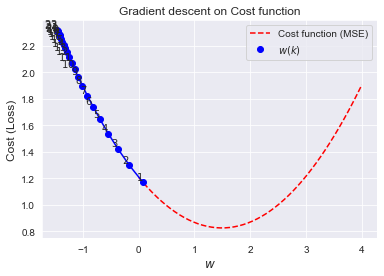

In [51]:
#Plot
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)') 

for i in range(0, len(history_loss)-1):
    w1, c1 = history_loss[i]
    w2, c2 = history_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.02, f'${i+1}$', ha='right' )
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.02, f'${i+2}$', ha='right')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')

plt.legend(loc=1)
plt.show()


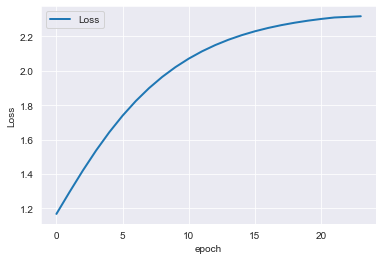

In [52]:
#Plot 
epoch = np.linspace(0,len(history_loss),num=len(history_loss)).astype('int')
step_loss = [ls[1] for ls in history_loss]

plt.plot(epoch,step_loss,lw=2,label ='Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [53]:
#Workshop 6 learnig rate 
#Add learining_rate = .17
#Gradient function 
def gradient(w,x,y_true):
    y_pred = neuron(w,x,)
    return 2*x*(y_pred,y_true)

#Update function delta w 
def delta_w(w_k,x,y,learning_rate):
    return learning_rate*np.mean(gradient(w_k,x,y))

#ค่า weight เริ่มต้
#w = np.random.rand()  #กรณืใช้ค่าสุ่ม

w=.08
learning_rate= .17   #Learning rate

#ทำการประมวลผล gradient descent updates และ print weight , loss
no_of_iteraion = 22  #จำนวน epoch

history_loss = [(w,loss_mse(neuron(x,w),y))]

for i in range(no_of_iteraion):
    dw = delta_w(w,x,y,learning_rate)  #update ผลต่าง dalta w 
    w= w-dw #Update current weight
    history_loss.append((w,loss_mse(neuron(x,w),y))) #บัททึก ค่า weight และ loss
    
#Print
for i in range(0,len(history_loss)):
    print('{} -> w: {:.2f} \t loss: {} '.format(i, history_loss[i][0], history_loss[i][1]))


0 -> w: 0.08 	 loss: 1.1682775244914259 
1 -> w: 0.03 	 loss: 1.1909361069898134 
2 -> w: -0.01 	 loss: 1.213626397049168 
3 -> w: -0.05 	 loss: 1.23630756257789 
4 -> w: -0.10 	 loss: 1.25894226055982 
5 -> w: -0.14 	 loss: 1.2814964029862408 
6 -> w: -0.18 	 loss: 1.3039389372303758 
7 -> w: -0.21 	 loss: 1.3262416400048187 
8 -> w: -0.25 	 loss: 1.348378924092633 
9 -> w: -0.29 	 loss: 1.370327657090234 
10 -> w: -0.32 	 loss: 1.3920669914447998 
11 -> w: -0.36 	 loss: 1.4135782051109853 
12 -> w: -0.39 	 loss: 1.4348445521913238 
13 -> w: -0.42 	 loss: 1.4558511229619873 
14 -> w: -0.45 	 loss: 1.4765847127206995 
15 -> w: -0.48 	 loss: 1.4970336989267004 
16 -> w: -0.51 	 loss: 1.5171879261338006 
17 -> w: -0.54 	 loss: 1.5370385982469372 
18 -> w: -0.57 	 loss: 1.5565781776602623 
19 -> w: -0.60 	 loss: 1.5758002908608495 
20 -> w: -0.62 	 loss: 1.5946996401066054 
21 -> w: -0.65 	 loss: 1.6132719208100728 
22 -> w: -0.67 	 loss: 1.6315137442815555 


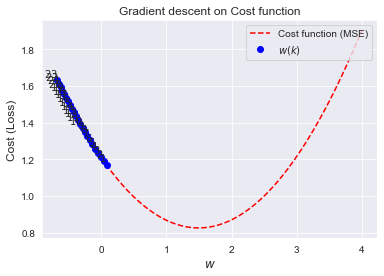

In [56]:
#Plot
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)') 

for i in range(0, len(history_loss)-1):
    w1, c1 = history_loss[i]
    w2, c2 = history_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.02, f'${i+1}$', ha='right' )
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.02, f'${i+2}$', ha='right')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')

plt.legend(loc=1)
plt.show()

In [59]:
#Wrokshop 7 weight   
# weight old .08

#Workshop 6 learnig rate 
#Gradient function 
def gradient(w,x,y_true):
    y_pred = neuron(w,x,)
    return 2*x*(y_pred,y_true)

#Update function delta w 
def delta_w(w_k,x,y,learning_rate):
    return learning_rate*np.mean(gradient(w_k,x,y))

#ค่า weight เริ่มต้
#w = np.random.rand()  #กรณืใช้ค่าสุ่ม

w=3.7
learning_rate= .9   #Learning rate

#ทำการประมวลผล gradient descent updates และ print weight , loss
no_of_iteraion = 22  #จำนวน epoch

history_loss = [(w,loss_mse(neuron(x,w),y))]

for i in range(no_of_iteraion):
    dw = delta_w(w,x,y,learning_rate)  #update ผลต่าง dalta w 
    w= w-dw #Update current weight
    history_loss.append((w,loss_mse(neuron(x,w),y))) #บัททึก ค่า weight และ loss
    
#Print
for i in range(0,len(history_loss)):
    print('{} -> w: {:.2f} \t loss: {} '.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 3.70 	 loss: 1.6621438296932975 
1 -> w: 2.90 	 loss: 1.164103669925995 
2 -> w: 2.22 	 loss: 0.915790243138037 
3 -> w: 1.64 	 loss: 0.8293158200865451 
4 -> w: 1.16 	 loss: 0.844439731178605 
5 -> w: 0.75 	 loss: 0.9202829132456413 
6 -> w: 0.40 	 loss: 1.0294677901132565 
7 -> w: 0.11 	 loss: 1.153982031661461 
8 -> w: -0.14 	 loss: 1.2822663313036635 
9 -> w: -0.35 	 loss: 1.4071701946131216 
10 -> w: -0.52 	 loss: 1.524522351264351 
11 -> w: -0.67 	 loss: 1.632135582129095 
12 -> w: -0.80 	 loss: 1.7291179175571931 
13 -> w: -0.91 	 loss: 1.8153993285335097 
14 -> w: -1.00 	 loss: 1.8914094965638562 
15 -> w: -1.07 	 loss: 1.9578610791175557 
16 -> w: -1.14 	 loss: 2.0156062758178463 
17 -> w: -1.19 	 loss: 2.0655440099446736 
18 -> w: -1.24 	 loss: 2.1085617860406303 
19 -> w: -1.28 	 loss: 2.1455010635654403 
20 -> w: -1.31 	 loss: 2.1771383663842996 
21 -> w: -1.34 	 loss: 2.2041767331635675 
22 -> w: -1.36 	 loss: 2.2272437929113234 


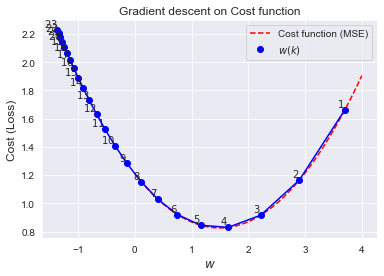

In [60]:
#Plot
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)') 

for i in range(0, len(history_loss)-1):
    w1, c1 = history_loss[i]
    w2, c2 = history_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.02, f'${i+1}$', ha='right' )
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.02, f'${i+2}$', ha='right')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')

plt.legend(loc=1)
plt.show()

In [61]:
#Workshop 8 Momentum
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
             metrics=['accuracy'])


import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=opt, 
             metrics=['accuracy'])

model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', 
             metrics=['accuracy'])

In [ ]:
#Workshop9  None Regularization
X, y = make_blobs(n_samples=300, centers=5, n_features=2, cluster_std=1.5, random_state=1)

#Error Code in the book which i use to learn  will reuse old code which Error all 9 - 14

In [ ]:
#Workshop10 Regularization L1

In [ ]:
#Workshop11  Regularization L2

In [ ]:
#Workshop12 Drop out 

In [ ]:
#Workshop13 Early Stopping 

In [ ]:
#Workshop14 Modelcheckpiont